In [ ]:
import matplotlib.pyplot as plt

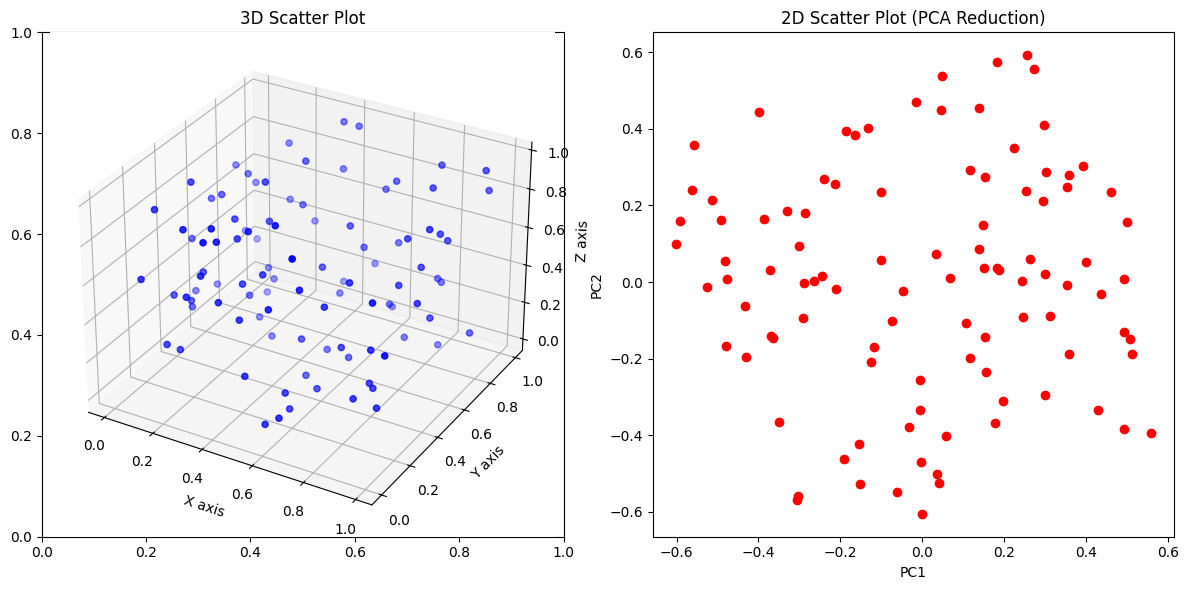

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Generate random 3D data
np.random.seed(42)
X = np.random.rand(100, 3)

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', marker='o')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# 2D Scatter plot
axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c='red', marker='o')
axs[1].set_title('2D Scatter Plot (PCA Reduction)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

plt.tight_layout()
plt.show()

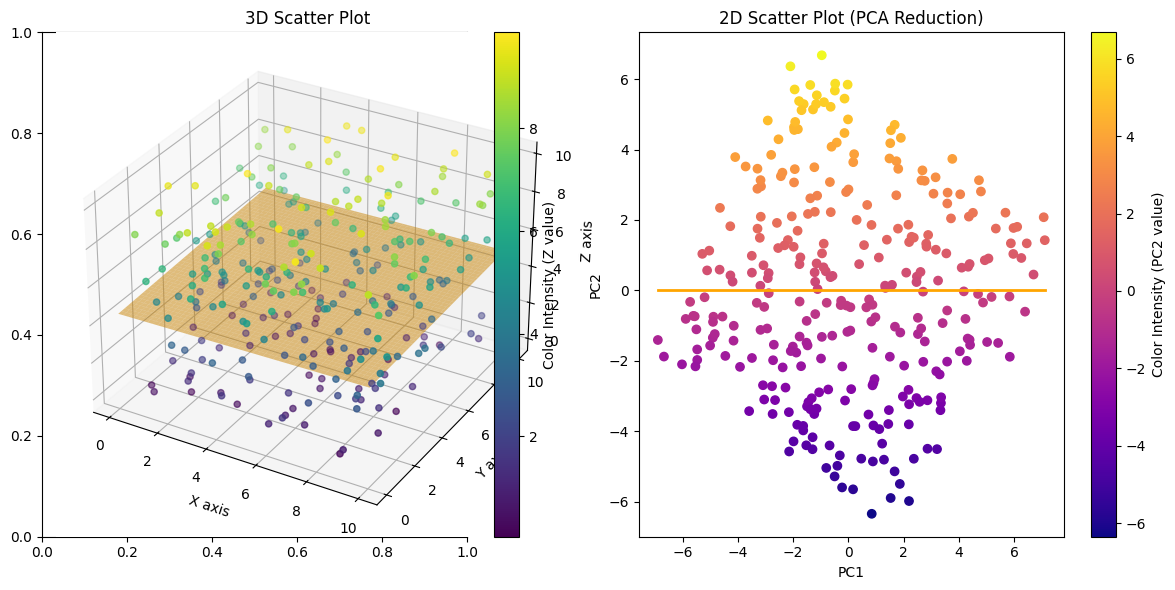

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate denser random 3D data
np.random.seed(42)
X = np.random.rand(300, 3) * 10

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X[:, :2], X[:, 2])
reg_2d = LinearRegression().fit(X_2d[:, :1], X_2d[:, 1])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=X_2d[:, 1], cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (PCA Reduction)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(x_vals_2d.reshape(-1, 1))
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Color Intensity (Z value)')
plt.colorbar(scatter2, ax=axs[1], label='Color Intensity (PC2 value)')

plt.tight_layout()
plt.show()

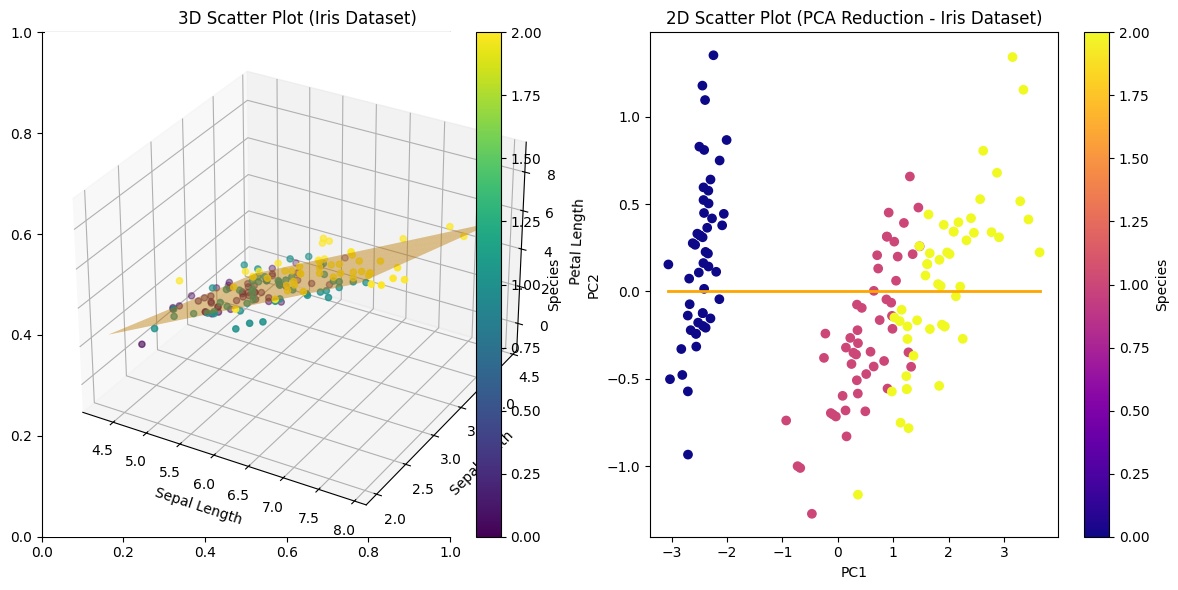

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # Take first 3 features

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X[:, :2], X[:, 2])
reg_2d = LinearRegression().fit(X_2d[:, :1], X_2d[:, 1])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Iris Dataset)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Regression line in 3D
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=iris.target, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (PCA Reduction - Iris Dataset)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(x_vals_2d.reshape(-1, 1))
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Species')
plt.colorbar(scatter2, ax=axs[1], label='Species')

plt.tight_layout()
plt.show()


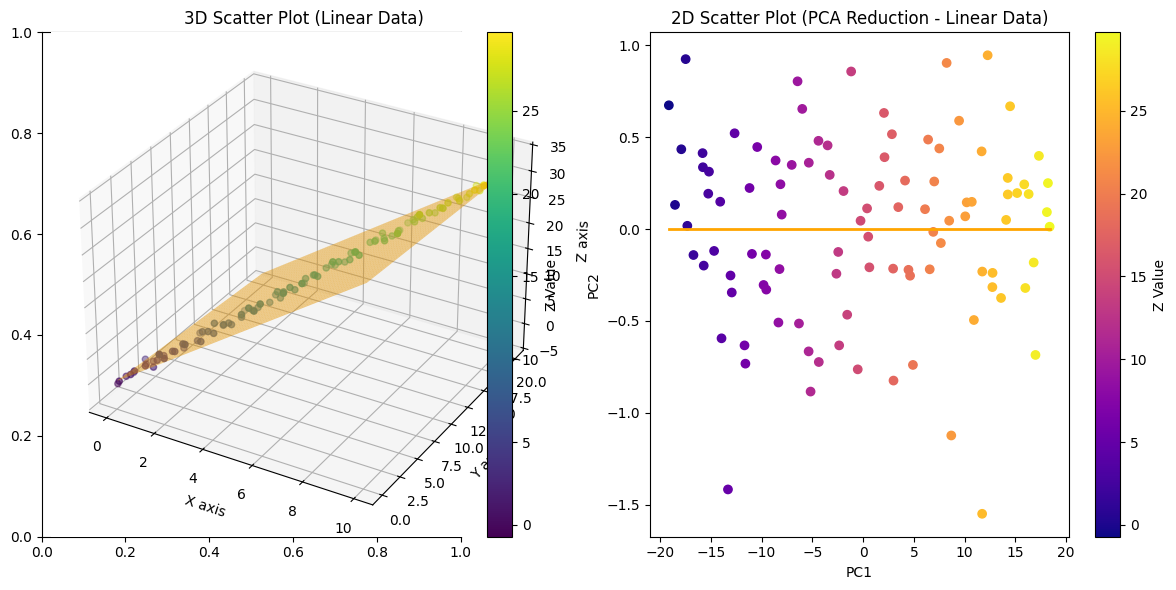

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_data)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])
reg_2d = LinearRegression().fit(X_2d[:, :1], X_2d[:, 1])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (PCA Reduction - Linear Data)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(x_vals_2d.reshape(-1, 1))
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()

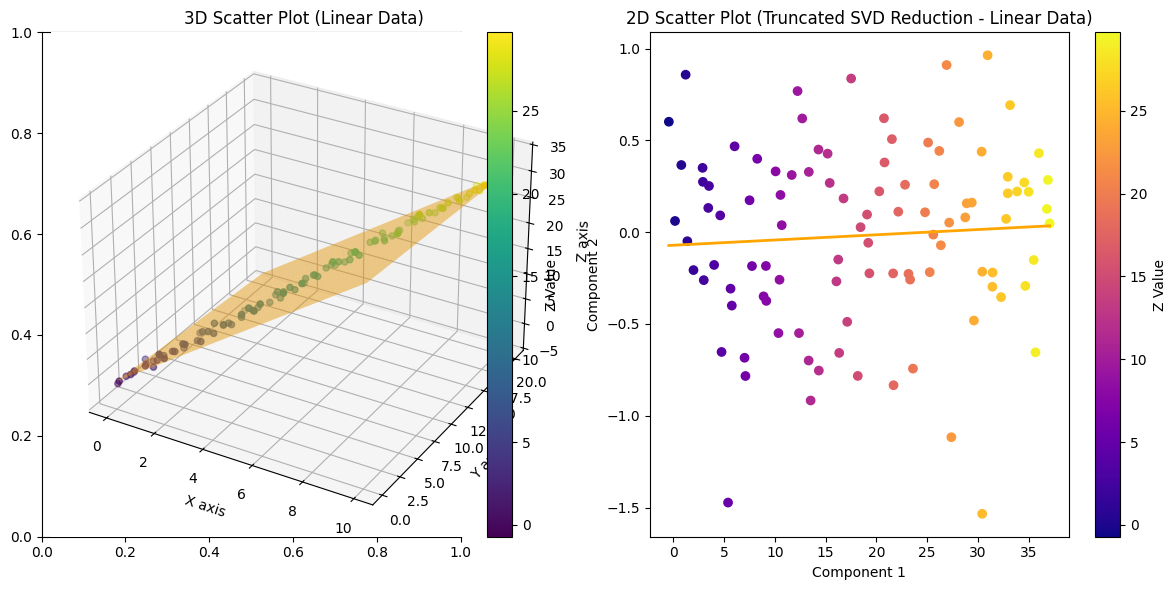

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_data)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])
reg_2d = LinearRegression().fit(X_2d[:, :1], X_2d[:, 1])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Linear Data)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(x_vals_2d.reshape(-1, 1))
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()

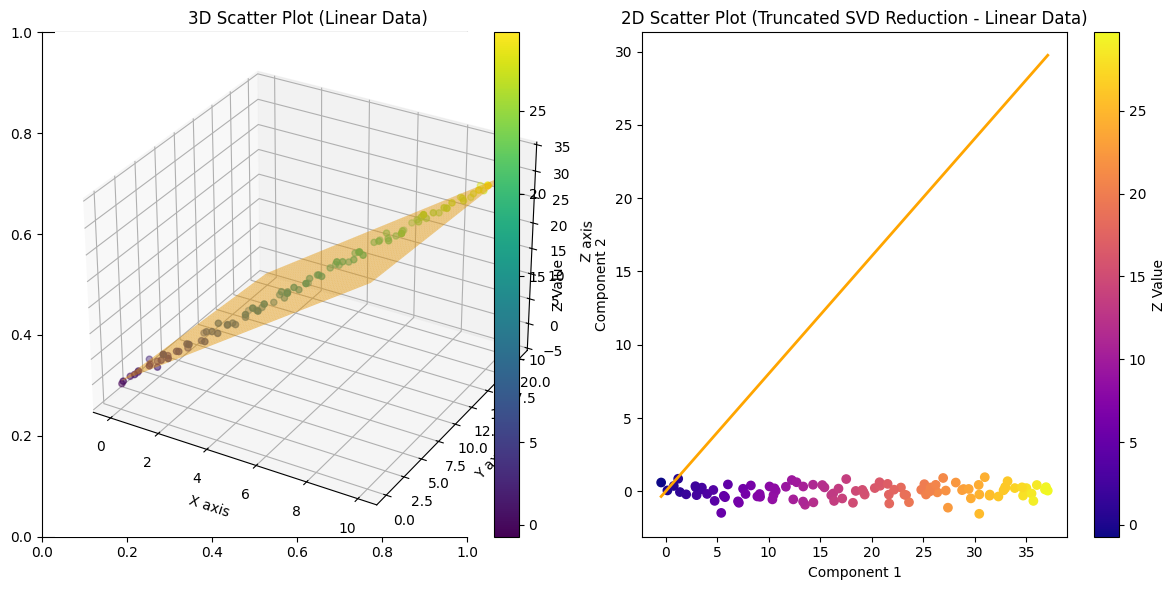

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_data)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])
reg_2d = LinearRegression().fit(X_2d, np.zeros(X_2d.shape[0]))  # Fit to both dimensions

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Linear Data)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

# Regression line in 2D using both dimensions
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
reg_2d_full = LinearRegression().fit(X_2d, Z)
y_pred_2d_full = reg_2d_full.predict(np.c_[x_vals_2d, np.zeros_like(x_vals_2d)])
axs[1].plot(x_vals_2d, y_pred_2d_full, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()

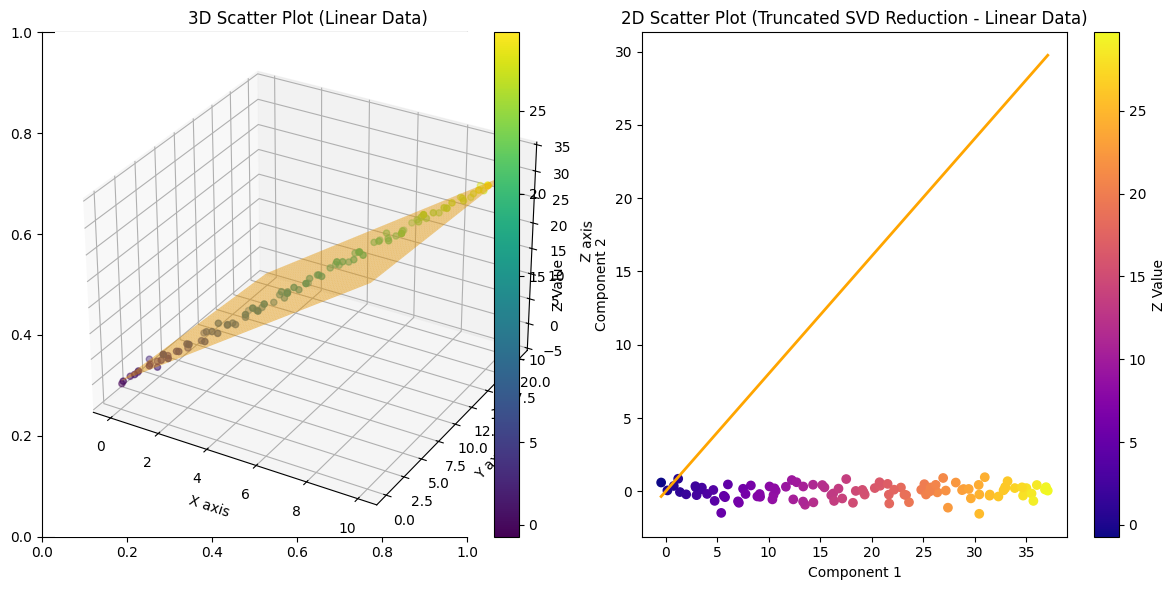

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Fit regression model in 3D
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_data)

# Fit regression model in 2D
reg_2d = LinearRegression().fit(X_2d, Z)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Linear Data)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(np.c_[x_vals_2d, np.zeros_like(x_vals_2d)])
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()


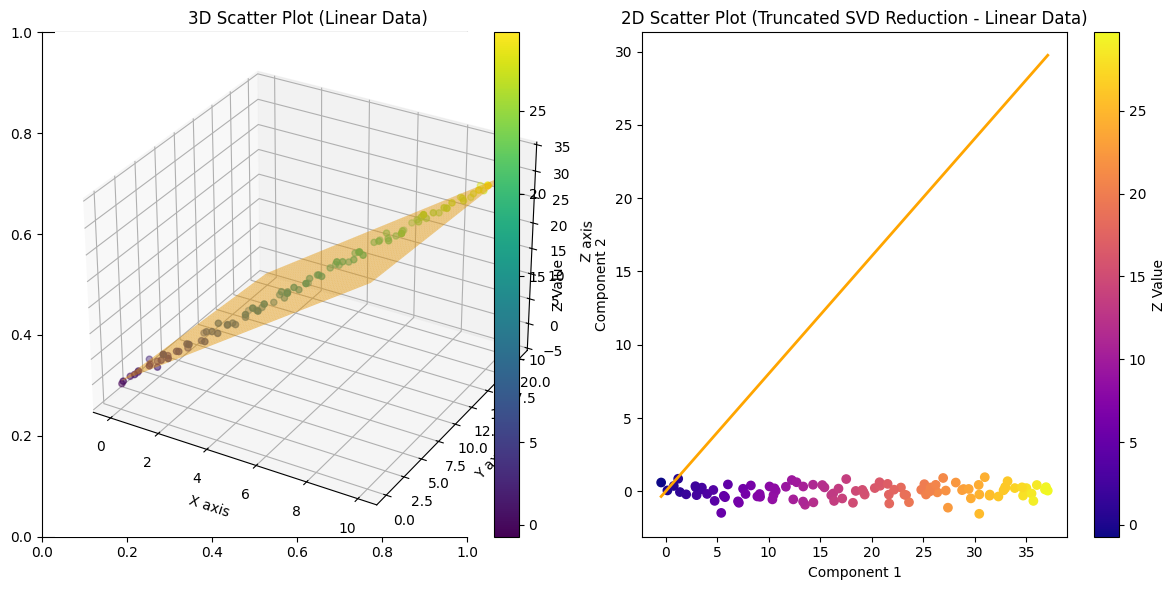

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Fit regression model in 3D
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_data)

# Fit regression model in 2D
reg_2d = LinearRegression().fit(X_2d, Z)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Linear Data)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(np.c_[x_vals_2d, np.zeros_like(x_vals_2d)])
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()


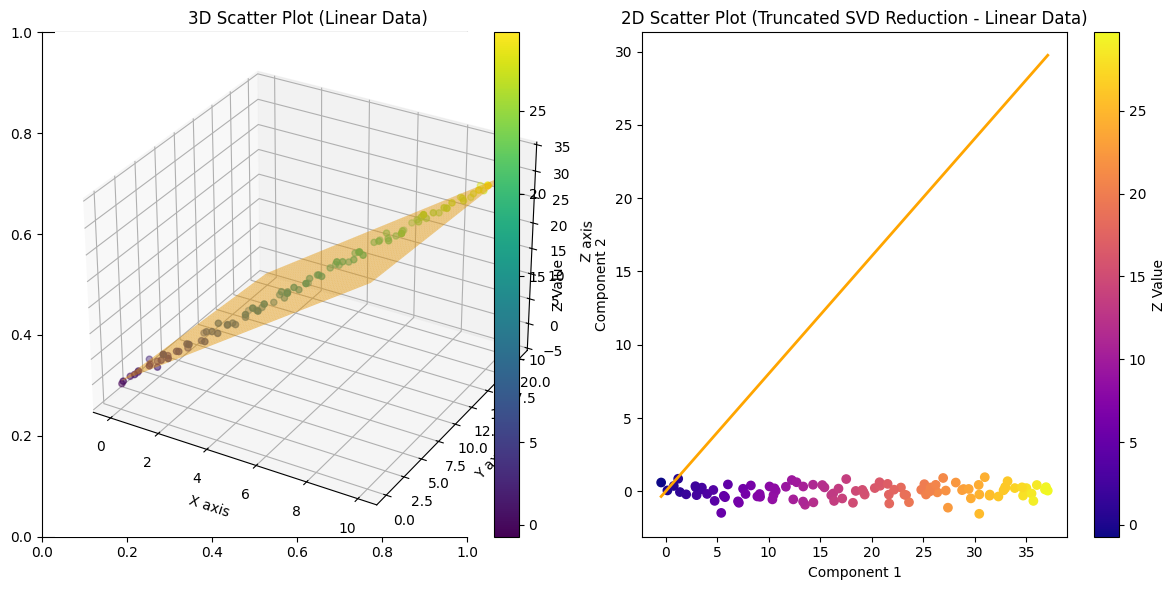

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# Generate linear 3D data
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
Z = 3 * X + np.random.normal(0, 0.5, 100)
X_data = np.c_[X, Y, Z]

# Fit regression model in 3D
reg_3d = LinearRegression().fit(X_data[:, :2], X_data[:, 2])

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_data)

# Fit regression model in 2D
reg_2d = LinearRegression().fit(X_2d, Z)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X_data[:, 0], X_data[:, 1], X_data[:, 2], c=Z, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Linear Data)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Regression line in 3D
x_vals = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_vals = np.linspace(X_data[:, 1].min(), X_data[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Z, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Linear Data)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

# Regression line in 2D
x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
y_pred_2d = reg_2d.predict(np.c_[x_vals_2d, np.zeros_like(x_vals_2d)])
axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

plt.colorbar(scatter, ax=axs[0], label='Z Value')
plt.colorbar(scatter2, ax=axs[1], label='Z Value')

plt.tight_layout()
plt.show()


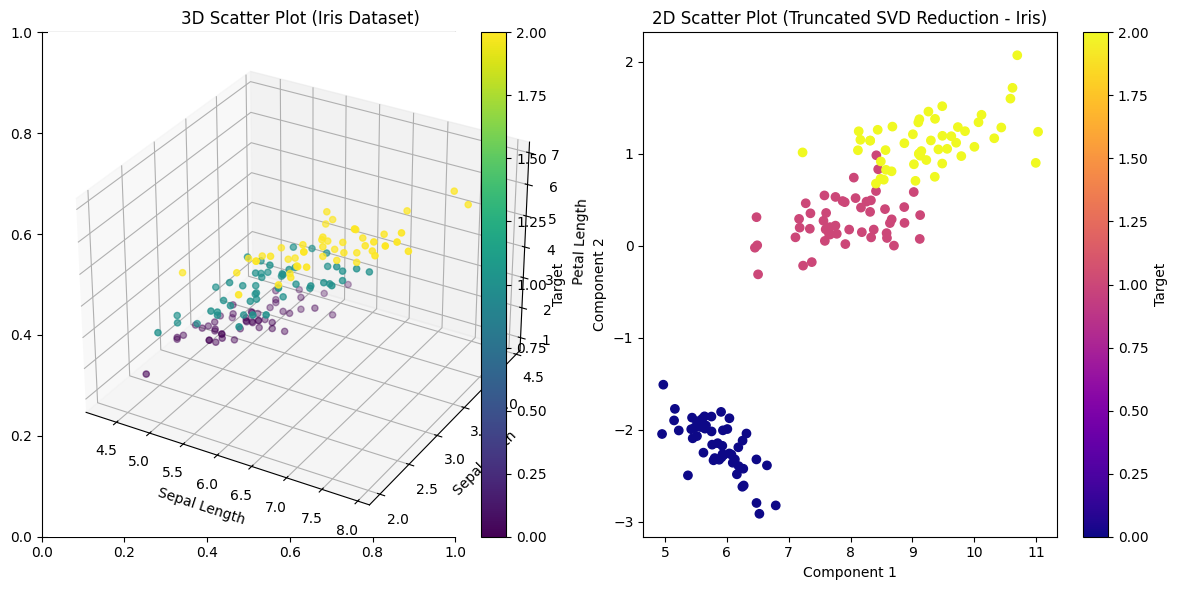

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Perform Truncated SVD to reduce to 2D
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X)

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Iris Dataset)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=Y, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (Truncated SVD Reduction - Iris)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')

plt.colorbar(scatter, ax=axs[0], label='Target')
plt.colorbar(scatter2, ax=axs[1], label='Target')

plt.tight_layout()
plt.show()


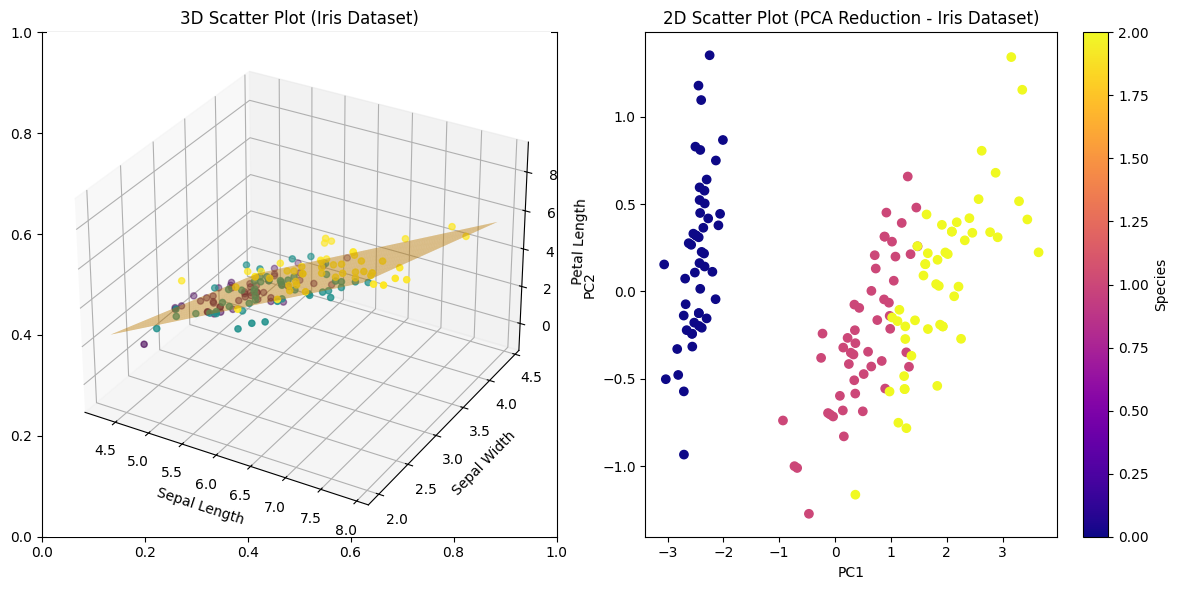

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # Take first 3 features

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Fit regression models for both 3D and 2D data
reg_3d = LinearRegression().fit(X[:, :2], X[:, 2])
reg_2d = LinearRegression().fit(X_2d[:, :1], X_2d[:, 1])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 3D Scatter plot
ax = axs[0]
ax = fig.add_subplot(1, 2, 1, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris.target, cmap='viridis', marker='o')
ax.set_title('3D Scatter Plot (Iris Dataset)')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Regression line in 3D
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_pred = reg_3d.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
ax.plot_surface(X_grid, Y_grid, Z_pred, color='orange', alpha=0.5)

# 2D Scatter plot
scatter2 = axs[1].scatter(X_2d[:, 0], X_2d[:, 1], c=iris.target, cmap='plasma', marker='o')
axs[1].set_title('2D Scatter Plot (PCA Reduction - Iris Dataset)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Regression line in 2D
# x_vals_2d = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
# y_pred_2d = reg_2d.predict(x_vals_2d.reshape(-1, 1))
# axs[1].plot(x_vals_2d, y_pred_2d, color='orange', linewidth=2)

# Only add colorbar for 2D plot
plt.colorbar(scatter2, ax=axs[1], label='Species')

plt.tight_layout()
plt.savefig("image_post")
plt.show()

